In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pima = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI Lab Project/diabetes.csv')

In [ ]:
pima.shape

(768, 9)

In [ ]:
type(pima)

pandas.core.frame.DataFrame

In [ ]:
pima_row_idx = pima.index
pima_row_idx

RangeIndex(start=0, stop=768, step=1)

In [ ]:
pima_col_idx = pima.columns
pima_col_idx

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
pima.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.isnull().sum()  # Checking Missing Values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<img src="https://i.ibb.co/647ZL2X/bmi.png" alt="bmi" border="0">

<img src="https://i.ibb.co/HTqTfdr/WHO-Europe-Nutrition-Body-mass-index-BMI.png" alt="WHO-Europe-Nutrition-Body-mass-index-BMI" border="0">

In [ ]:
#creating nutritional status column
Nutritional_status = pd.Series([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
#Nutritional status based on BMI

for i in range(len(pima)):
  if pima['BMI'][i] == 0.0:
    Nutritional_status[i]= "NA"

  elif pima['BMI'][i] < 18.5:
    Nutritional_status[i]="Underweight"

  elif pima['BMI'][i] < 25:
    Nutritional_status[i]="Normal"

  elif pima['BMI'][i] >= 25 and pima['BMI'][i]<30:
    Nutritional_status[i]="Overweight"

  elif pima['BMI'][i] >= 30:
        Nutritional_status[i]="Obese"

  else:
    Nutritional_status[i]= pima['BMI'][i] #for non int/double value

In [ ]:
#Inserting new column NutritionalStatus
pima.insert(6,"NutritionalStatus", Nutritional_status)

In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,NutritionalStatus,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,Obese,0.627,50,1
1,1,85,66,29,0,26.6,Overweight,0.351,31,0
2,8,183,64,0,0,23.3,Normal,0.672,32,1
3,1,89,66,23,94,28.1,Overweight,0.167,21,0
4,0,137,40,35,168,43.1,Obese,2.288,33,1


In [ ]:
pima['NutritionalStatus'].value_counts()

Obese          472
Overweight     179
Normal         102
NA              11
Underweight      4
Name: NutritionalStatus, dtype: int64

In [ ]:
pima.shape

(768, 10)

In [ ]:
#Creating OGTT_Interpretation (Interpretation of Glucose level) column
OGTT_Interpretation = pd.Series([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
# Interpretation of OGTT (Glucose) - using OGTT levels recommended by DIABETES UK (2019)

for i in range(len(pima)):
    if pima['Glucose'][i] == 0.0:
        OGTT_Interpretation [i]="NA"

    elif pima['Glucose'][i] <= 140:
        OGTT_Interpretation [i]="Normal"

    elif pima['Glucose'][i] > 140 & pima['Glucose'][i] <= 198:
        OGTT_Interpretation [i]="Impaired Glucose Tolerance"

    elif pima['Glucose'][i] > 198:
        OGTT_Interpretation[i]="Diabetic Level"

    else:
        OGTT_Interpretation [i]= pima['Glucose'][i]

In [ ]:
#Inserting New Column GlucoseResult
pima.insert(2,"GlucoseResult", OGTT_Interpretation)

In [ ]:
pima['GlucoseResult'].value_counts()

Normal                        571
Impaired Glucose Tolerance    192
NA                              5
Name: GlucoseResult, dtype: int64

In [ ]:
Imparied_Glucose_Tolerance_Diabetic = ((pima ['Glucose'] > 140) & (pima ['Glucose'] <=198) & (pima ['Outcome'] == 1)).sum()
Imparied_Glucose_Tolerance_Diabetic

131

In [ ]:
Normal_Glucose_Diabetic = ((pima['Glucose'] != 0 ) & (pima['Glucose'] <= 140) & (pima['Outcome'] == 1)).sum()
Normal_Glucose_Diabetic

134

<a href="https://ibb.co/4NDNNx1"><img src="https://i.ibb.co/KyQyyHK/table-triceps-skin-fold.png" alt="table-triceps-skin-fold" border="0"></a>

In [ ]:
# Creating Percentile of skin thickness column
Percentile_skin_thickness = pd.Series([])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
# Checking how many women are 80 or older (the Percentile skin thickeness depend of skin fold and age)
pima['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [ ]:
#Checking skin fold thickness Percentile

for i in range(len(pima)):


    if pima["Age"][i] >= 20.0 and pima["Age"][i] <= 79.0:

        if pima["SkinThickness"][i] == 0.0:
            Percentile_skin_thickness[i]=" 0 NA"

        elif pima["SkinThickness"][i] < 11.9:
            Percentile_skin_thickness[i]="1 <P5th"

        elif pima["SkinThickness"][i] == 11.9:
            Percentile_skin_thickness[i]="2 P5th"

        elif pima["SkinThickness"][i] > 11.9 and pima["SkinThickness"][i] < 14.0:
            Percentile_skin_thickness[i]="3 P5th - P10th"

        elif pima["SkinThickness"][i] == 14.0:
            Percentile_skin_thickness[i]="4 P10th"

        elif pima["SkinThickness"][i] > 14.0 and  pima["SkinThickness"][i] < 15.8:
            Percentile_skin_thickness[i]="5 P10th - P15th"

        elif pima["SkinThickness"][i] == 15.8:
            Percentile_skin_thickness[i]="6 P15th"

        elif pima["SkinThickness"][i] > 15.8 and pima["SkinThickness"][i] < 18.0:
            Percentile_skin_thickness[i]="7 P15th - P25th"

        elif pima["SkinThickness"][i] == 18.0:
            Percentile_skin_thickness[i]="8 P25th"

        elif pima["SkinThickness"][i] > 18.0 and pima["SkinThickness"][i] < 23.5:
            Percentile_skin_thickness[i]="9 P25th - P50th"

        elif pima["SkinThickness"][i] == 23.5:
            Percentile_skin_thickness[i]="10 P50th"

        elif pima["SkinThickness"][i] > 23.5 and pima["SkinThickness"][i] < 29.0:
            Percentile_skin_thickness[i]="11 P50th - P75th"

        elif pima["SkinThickness"][i] == 29.0:
            Percentile_skin_thickness[i]="12 P75th"

        elif pima["SkinThickness"][i] > 29.0 and pima["SkinThickness"][i] < 31.9:
            Percentile_skin_thickness[i]="13 P75th - P85th"

        elif pima["SkinThickness"][i] == 31.9:
            Percentile_skin_thickness[i]="14 P85th"

        elif pima["SkinThickness"][i] > 31.9 and pima["SkinThickness"][i] < 33.7:
            Percentile_skin_thickness[i]="15 P85th - P90th"

        elif pima["SkinThickness"][i] == 33.7:
            Percentile_skin_thickness[i]="16 P90th"

        elif pima["SkinThickness"][i] > 33.7 and pima["SkinThickness"][i] < 35.9:
            Percentile_skin_thickness[i]="17 P90th - P95th"

        elif pima["SkinThickness"][i] == 35.9:
            Percentile_skin_thickness[i]="18 P95th"

        elif pima["SkinThickness"][i] > 35.9:
            Percentile_skin_thickness[i]="19 >P95th"

    elif pima["Age"][i] >= 80.0:  #Only 1 woman is 81 years old
        if  pima["SkinThickness"][i] > 31.7:
            Percentile_skin_thickness[i]="20 >P95th"

In [ ]:
# Inserting new column PercentileOfSkinThickness

pima.insert(4, "PercentileOfSkinThickness", Percentile_skin_thickness)

In [ ]:
pima.head()

,Pregnancies,Glucose,GlucoseResult,BloodPressure,PercentileOfSkinThickness,SkinThickness,Insulin,BMI,NutritionalStatus,DiabetesPedigreeFunction,Age,Outcome
0,6,148,Impaired Glucose Tolerance,72,17 P90th - P95th,35,0,33.6,Obese,0.627,50,1
1,1,85,Normal,66,12 P75th,29,0,26.6,Overweight,0.351,31,0
2,8,183,Impaired Glucose Tolerance,64,0 NA,0,0,23.3,Normal,0.672,32,1
3,1,89,Normal,66,9 P25th - P50th,23,94,28.1,Overweight,0.167,21,0
4,0,137,Normal,40,17 P90th - P95th,35,168,43.1,Obese,2.288,33,1


In [ ]:
# Checking number of women x Percentile of skin thickness

pima['PercentileOfSkinThickness'].value_counts()

 0 NA               227
19 >P95th           145
11 P50th - P75th     87
9 P25th - P50th      79
15 P85th - P90th     50
13 P75th - P85th     46
17 P90th - P95th     23
8 P25th              20
7 P15th - P25th      20
3 P5th - P10th       18
12 P75th             17
1 <P5th              15
5 P10th - P15th      14
4 P10th               6
20 >P95th             1
Name: PercentileOfSkinThickness, dtype: int64

In [ ]:
diabetic_malnourished_st = ((pima['SkinThickness'] <15.8) & (pima['Outcome'] == 1)).sum() #have to check for 0.0 value**

In [ ]:
diabetic_malnourished_bmi = ((pima['BMI'] < 18.5) & (pima['Outcome'] == 1)).sum()
diabetic_malnourished_bmi

2

In [ ]:
diabetic_malnourished_bmi_st = ((pima ['BMI'] < 18.5) & (pima ['SkinThickness'] < 15.8) & (pima ['Outcome'] == 1)).sum()
diabetic_malnourished_bmi_st

2

In [ ]:
# Minimum
pima.min()

Pregnancies                                           0
Glucose                                               0
GlucoseResult                Impaired Glucose Tolerance
BloodPressure                                         0
PercentileOfSkinThickness                          0 NA
SkinThickness                                         0
Insulin                                               0
BMI                                                 0.0
NutritionalStatus                                    NA
DiabetesPedigreeFunction                          0.078
Age                                                  21
Outcome                                               0
dtype: object

In [ ]:
# Maximum
pima.max()

Pregnancies                               17
Glucose                                  199
GlucoseResult                         Normal
BloodPressure                            122
PercentileOfSkinThickness    9 P25th - P50th
SkinThickness                             99
Insulin                                  846
BMI                                     67.1
NutritionalStatus                Underweight
DiabetesPedigreeFunction                2.42
Age                                       81
Outcome                                    1
dtype: object

In [ ]:
pima_underweight = pima[pima['NutritionalStatus'] == 'Underweight']
pima_underweight

,Pregnancies,Glucose,GlucoseResult,BloodPressure,PercentileOfSkinThickness,SkinThickness,Insulin,BMI,NutritionalStatus,DiabetesPedigreeFunction,Age,Outcome
239,0,104,Normal,76,0 NA,0,0,18.4,Underweight,0.582,27,0
418,1,83,Normal,68,0 NA,0,0,18.2,Underweight,0.624,27,0
438,1,97,Normal,70,5 P10th - P15th,15,0,18.2,Underweight,0.147,21,0
526,1,97,Normal,64,9 P25th - P50th,19,82,18.2,Underweight,0.299,21,0


In [ ]:
#Counting the outcome (diabetes)

In [ ]:
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
count_not_diabetic = len(pima[pima['Outcome'] == 0])
count_not_diabetic

500

In [ ]:
# Checking Average of features grouped by Outcome (Diabetes)

pima.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
pima.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

As some of the women have no information of a number of attributes, such as glucose, blood pressure and BMI the average of those items might not be correct. To get the correct value only the women with a value > zero should be included to calculate the average.

In [ ]:
# Showing women that contains information about Glucose

pima_glucose = pima.loc[pima['Glucose'] != 0]

In [ ]:
pima_glucose.shape

(763, 12)

Most women of the sample have data regarding glucose (only 5 of them don't have any glucose value) as it is an important information to check the health status of a diabetic person.


In [ ]:
pima_glucose['Glucose'].mean()

121.6867627785059

The average of glucose is ar the normal range (less than 140 mg/dl).

In [ ]:
pima_glucose.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.311871,110.643863,68.213280,19.631791,69.160966,30.317304,0.430662,31.247485
1,4.860902,142.319549,70.800752,22.056391,101.090226,35.106015,0.550605,37.052632


In [ ]:
# Checking minimum and maximum values of glucose from women that don't have zero value of glucose

In [ ]:
pima_glucose['Glucose'].min()

44

In [ ]:
pima_glucose['Glucose'].max()

199

As it shows above, some women have information about glucose but no information about insulin. Moreover, it shows that 5 women don't have information about glucose as the result shows 763 rows. Furthermore, the maximum value of glucose is 199, considered a Diabetic level. Therefore, even diagnosed with diabetes they don't present high glucose value. The dataset should have information about drug therapy.

In [ ]:
# Showign Women that have information about Blood pressure

pima_BloodPressure = pima.loc[pima['BloodPressure'] != 0]

In [ ]:
pima_BloodPressure.shape

(733, 12)

35 women don't have information about Blood Pressure as the result shows 733 rows.


In [ ]:
# Checking the average of blood pressure (having the value of blood pressure != 0)

pima_BloodPressure['BloodPressure'].mean()

72.40518417462484

In [ ]:
# Minimum and maximum

In [ ]:
pima_BloodPressure['BloodPressure'].min()

24

In [ ]:
pima_BloodPressure['BloodPressure'].max()

122

Similar Code on Insuline

In [ ]:
pima_insulin = pima.loc[pima['Insulin'] != 0]

pima_insulin.shape

(394, 12)

In [ ]:
pima_insulin['Insulin'].mean()

155.5482233502538

In [ ]:
pima_insulin['Insulin'].min()

14

In [ ]:
pima_insulin['Insulin'].max()

846

Normal range of 2h insulin is from 16 to 166 mIU/L. The average value of 2h insulin of the samples show a normal range. However, some women of the sample seem to present high level of insulin level. It might be due obesity, early stage of T2DM or excessive insulin administration.

In [ ]:
pima_BMI = pima.loc[pima['BMI'] != 0]

In [ ]:
pima_BMI.shape

(757, 12)

In [ ]:
pima_BMI['BMI'].mean()

32.457463672391015

The average value of BMI indicates obesity (BMI >= 30 kg/m2)

In [ ]:
pima_BMI['BMI'].min()

18.2

In [ ]:
pima_BMI['BMI'].max()

67.1

The minimum value of BMI shows that there is no case of underweight, but the maximum value shows cases of women with morbid obesity (BMI >= 40kg/m2).

In [ ]:
# Checking only the women that have all the values of BMI, Glucose, Insulin and Blood Pressure

pima_all = pima.loc[(pima['BloodPressure'] != 0) & (pima['BMI'] != 0) & (pima['Glucose'] != 0) & (pima['Insulin'] != 0)]

In [ ]:
pima_all.shape

(392, 12)

Only 392 women have information about all the attributes. That number represents less than half of the sample (around 49% of the women of the sample have all information of all attributes).

In [ ]:
pima_all['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

In [ ]:
pima_all.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Pregnancies                   3.301020
Glucose                     122.627551
BloodPressure                70.663265
SkinThickness                29.145408
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
Outcome                       0.331633
dtype: float64

In [ ]:
pima_all.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


Diabetic women tend to have higher number of pregnancies, higher level of glucose, higher Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age. Both groups present BMI that indicates obesity. Women that have Diabetes have an average of insulin that is higher than the normal range (16 - 166 mIU/L). Both groups have average of glucose higher than the normal range (<= 100 mg/dL). It might indicate that some non diabetic women are in risk of have Diabetes in the future, specially the ones with higher levels of insulin (that might have insulin resistance).

In [ ]:
pima_all.min()

Pregnancies                                           0
Glucose                                              56
GlucoseResult                Impaired Glucose Tolerance
BloodPressure                                        24
PercentileOfSkinThickness                       1 <P5th
SkinThickness                                         7
Insulin                                              14
BMI                                                18.2
NutritionalStatus                                Normal
DiabetesPedigreeFunction                          0.085
Age                                                  21
Outcome                                               0
dtype: object

In [ ]:
pima_all.max()

Pregnancies                               17
Glucose                                  198
GlucoseResult                         Normal
BloodPressure                            110
PercentileOfSkinThickness    9 P25th - P50th
SkinThickness                             63
Insulin                                  846
BMI                                     67.1
NutritionalStatus                Underweight
DiabetesPedigreeFunction                2.42
Age                                       81
Outcome                                    1
dtype: object

In [ ]:
diabetic_malnourished = ((pima_all['SkinThickness'] < 15.8) & (pima_all['Outcome'] == 1)).sum()
diabetic_malnourished

4

4 from 130 Diabetic women are malnourished.

In [ ]:
diabetic_overweighted_obese = ((pima_all['BMI'] <=30) & (pima_all['Outcome'] == 1)).sum()
diabetic_overweighted_obese

20

20 from 130 Diabetic women are overweight or obese.

**Attributes Distribution**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style


In [ ]:
style.use('seaborn-whitegrid')

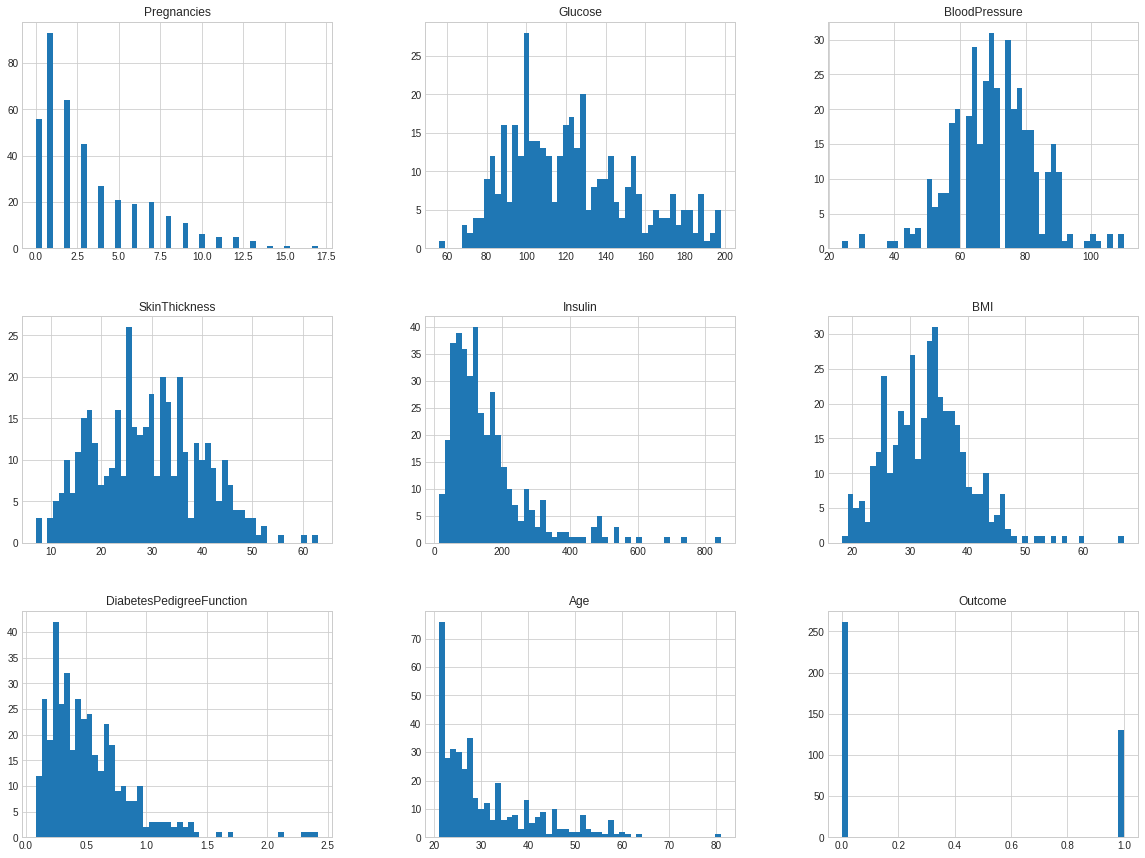

In [ ]:
# Histogram
pima_all.hist(bins=50, figsize=(20, 15))
plt.show()

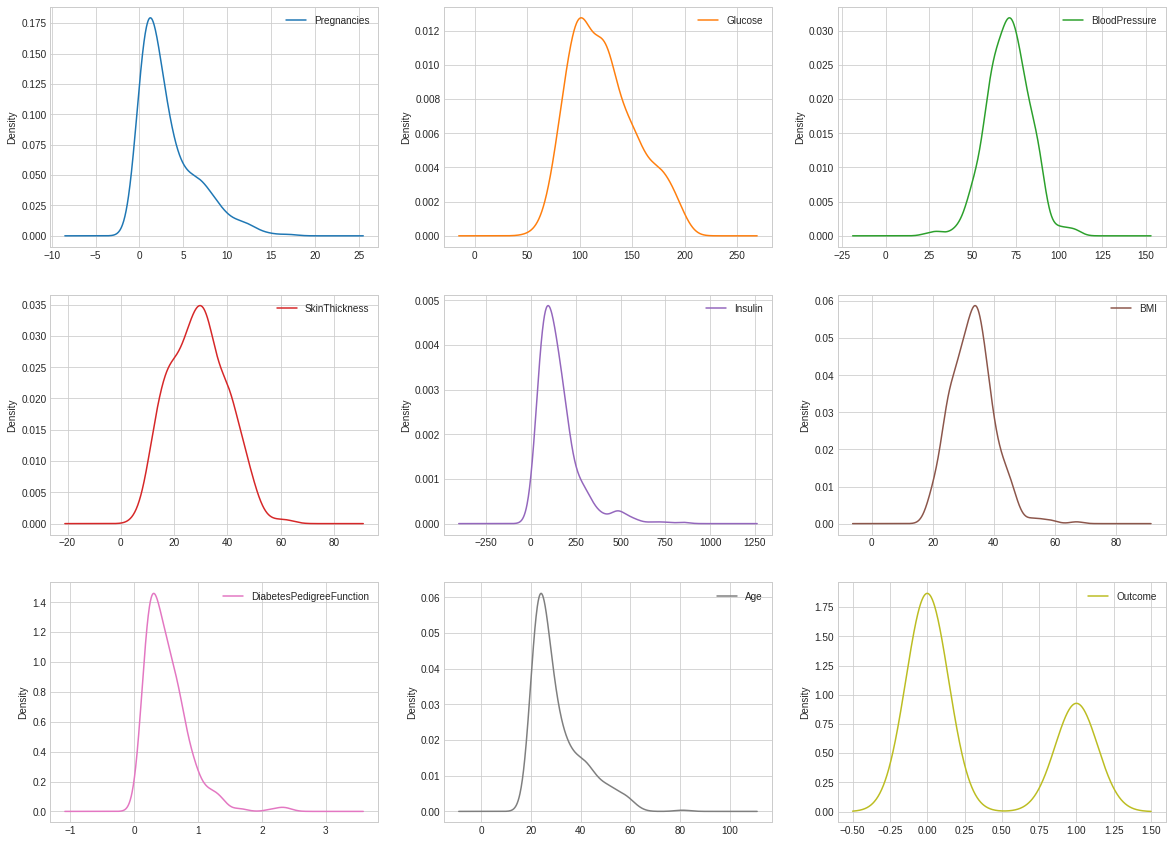

In [ ]:
# Density plots for all attributes to visualize the distribution of each attribute
pima_all.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

In [ ]:
# Box and Whisler plot to visualize the dustribution of all atributes

#pima_all.plot(kind= 'box', subplots=True, layout=(3,3), sharex=False, figsize=(20,15))

 **Bell shape curve: Blood Pressure**

**Right-Skewed: Age, Insulin, Pregnancies, Diabetes Pedigree Function**

**Short IQR: insulin, Diabetes Pedigree Function, Blood Pressure and BMI**

**At least 75% of the women:**

* are 25 years old or older
*have BMI nearly 30 kg/m2
*have insulin level 100 or more
*have 1 or more pregnancies
*have glucose level of 100 mg/dL or more
*have blood pressure of 60 mmHg or more

**Correlation**

In [ ]:
# Correlation between the different charachteristics. Closer to 1 better is the correlation.
corr_matrix_person = pima_all.corr(method='pearson')
corr_matrix_person

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


**There are no strong correlation between the features. The 'strongest' ones are the following (as expected):**
* Age x pregnancies (0.68) - Older women tend to have higher number of pregnancies
*Glucose x insulin (0.58)
*Glucose x outcome (0.52) - Women that have higher level of glucose tend to have higher level of insulin and have DM
*Skin fold thickness x BMI (0.66) - Women with higher skin fold thickness value have higher BMI (and probably are overweight/obese)

**Negative correlation:**

* BMI x Pregnancies (-0.025)
*Blood Pressure x Diabetes Pedigree Function (-0.016)

In [ ]:
import seaborn as sns

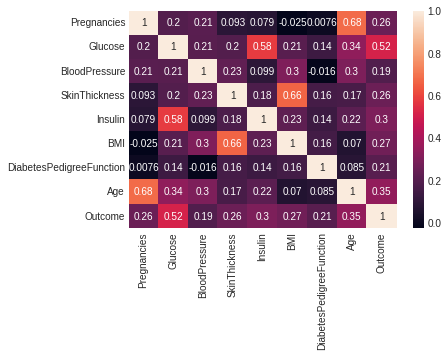

In [ ]:
sns.heatmap(corr_matrix_person, annot=True)

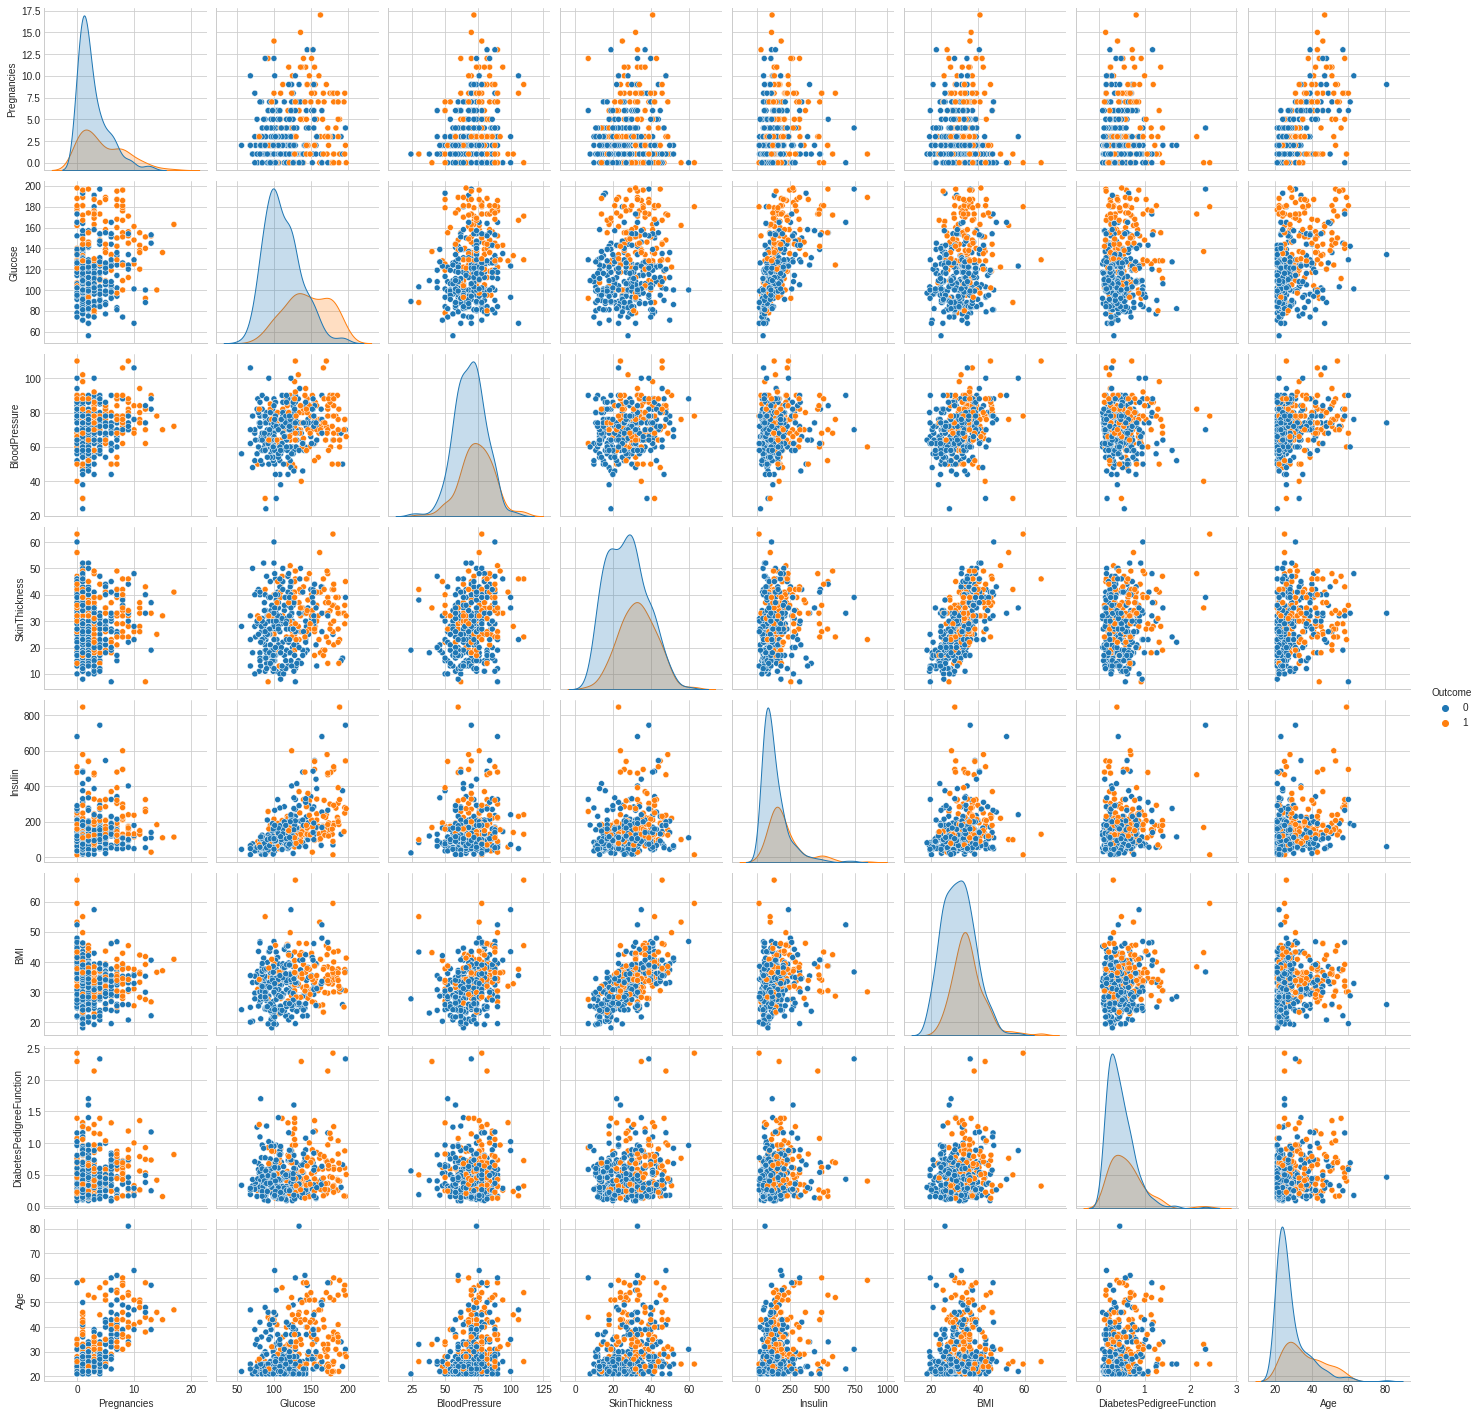

In [ ]:
#pairplot

sns.pairplot(pima_all, hue='Outcome')

Diabetic women tend to show larger values of age, BMI, insulin, skin thickness, blood pressure, and pregnancies.

The feature that it is possible to see 2 distinct groups (diabetic and non diabetic) is glucose.

**Logistic Regration**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
logreg= LogisticRegression()
var2=["Pregnancies", "Glucose", "BloodPressure"]
X=pima_all[var2]
Y=pima_all.Outcome
logreg.fit(X,Y)

#Defining the y_pred variable for the npredecting values.
Y_pred=logreg.predict(X)

#Calculating the  percision of the Model
print(classification_report(Y,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       262
           1       0.68      0.55      0.61       130

    accuracy                           0.77       392
   macro avg       0.74      0.71      0.72       392
weighted avg       0.76      0.77      0.76       392



The model precision of (model 2) (3 variables) is 77%

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y, Y_pred)
print(confusion_matrix)

[[229  33]
 [ 59  71]]


The confusion matrix shows that 229 + 71 are correct predictions and 59 + 33 are incorrect predictions.

**Classifier**

In [ ]:
import sklearn.neighbors as nei

In [ ]:
# Predict the outcome - knn

inputs = pima_all[['GlucoseResult', 'Insulin','PercentileOfSkinThickness','NutritionalStatus','BMI','Age']]

In [ ]:
outputs = pima_all['Outcome']

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(inputs, outputs)

ValueError: ignored

In [ ]:
# Evalute knn

(knn.predict(inputs) == outputs).sum()

ValueError: ignored

From 392, 322 got correct outcome predicted.

In [ ]:
import sklearn.model_selection as mod

In [ ]:
#Spliting the train set - 1/3 is to test

inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs,outputs,test_size= 0.33)

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier()

In [ ]:
(knn.predict(inputs_test)== outputs_test).sum()

93

In [ ]:
#Counting how many women are Positive (1) and Negative (0) for diabetes in the test set

outputs_test.value_counts()

0    87
1    43
Name: Outcome, dtype: int64

**Checking classification accuracy with knn = 5**

In [ ]:
from sklearn import metrics

In [ ]:
outputs_pred = knn.predict(inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy

0.7153846153846154

In [ ]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

In [ ]:
# 10-fold cross-validation with knn = 5

scores = cross_val_score (knn, inputs, outputs, cv=10, scoring='accuracy')
scores

array([0.725     , 0.8       , 0.64102564, 0.61538462, 0.64102564,
       0.74358974, 0.66666667, 0.82051282, 0.76923077, 0.79487179])

In [ ]:
scores.mean()

0.7217307692307692

**Optimal value of k**

In [ ]:
k_range = range(1,41)
k_scores = []

In [ ]:
for k in k_range:
  knn = nei.KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, inputs, outputs, cv = 10,scoring = 'accuracy')
  k_scores.append(scores.mean())

In [ ]:
k_scores

[0.7222435897435897,
 0.7396794871794872,
 0.7297435897435897,
 0.7369871794871795,
 0.7217307692307692,
 0.7396153846153846,
 0.7522435897435897,
 0.7523717948717948,
 0.7499358974358974,
 0.7625641025641026,
 0.7702564102564102,
 0.7625641025641026,
 0.7652564102564102,
 0.7574358974358975,
 0.7473717948717948,
 0.7472435897435897,
 0.7575,
 0.7549358974358974,
 0.752371794871795,
 0.7575641025641026,
 0.755,
 0.7498076923076923,
 0.7472435897435897,
 0.7548717948717949,
 0.7472435897435898,
 0.7497435897435898,
 0.7471794871794872,
 0.7523076923076923,
 0.7471794871794872,
 0.7523076923076923,
 0.7548717948717949,
 0.7574358974358975,
 0.7548717948717949,
 0.7523717948717948,
 0.7574358974358975,
 0.7574358974358975,
 0.7676282051282051,
 0.7625641025641026,
 0.76,
 0.7599358974358974]

Text(0, 0.5, 'Cross-validation accuracy')

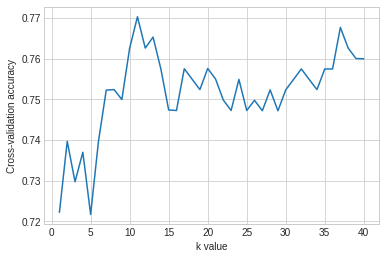

In [ ]:
#Visualise best k number

plt.plot(k_range, k_scores)
plt.xlabel('k value')
plt.ylabel('Cross-validation accuracy')

In [ ]:
#optimal value for k is 11

knn = nei.KNeighborsClassifier(n_neighbors=11)
knn.fit(inputs_train, outputs_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
(knn.predict(inputs_test) == outputs_test).sum()

98

In [ ]:
outputs_pred = knn.predict(inputs_test)
accuracy = metrics.accuracy_score(outputs_test, outputs_pred)
accuracy

0.7538461538461538

In [ ]:
# 10-fold cross-validation with knn = 3
scores = cross_val_score (knn, inputs, outputs, cv = 10, scoring = 'accuracy')
scores

array([0.775     , 0.825     , 0.66666667, 0.61538462, 0.74358974,
       0.87179487, 0.74358974, 0.87179487, 0.79487179, 0.79487179])

In [ ]:
# Average accuracy score

scores.mean()

0.7702564102564102

THE END